In [1]:
pip install numpy pandas sklearn xgboost

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import os, sys
from sklearn.preprocessing import MinMaxScaler
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [3]:
df=pd.read_csv('C:\\Users\\Arinola\\Documents\\PhD data\Hackbio\\Stage 2\\Parkinsons project\\parkinsons.data')
df.head()


,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [4]:
features=df.loc[:,df.columns!='status'].values[:,1:]
labels=df.loc[:,'status'].values

In [5]:
print(labels[labels==1].shape[0], labels[labels==0].shape[0])

147 48


In [6]:
scaler=MinMaxScaler((-1,1))
x=scaler.fit_transform(features)
y=labels

In [7]:
x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=0.2, random_state=7)

In [8]:
model=XGBClassifier()
model.fit(x_train,y_train)

C:\Users\Arinola\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:39:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [9]:
y_pred=model.predict(x_test)
print(accuracy_score(y_test, y_pred)*100)

94.87179487179486


<AxesSubplot:>

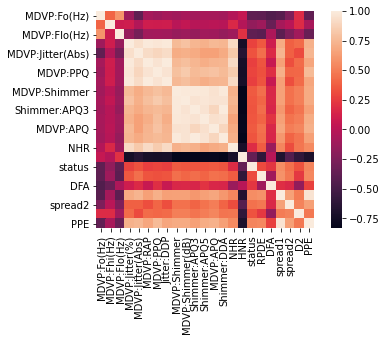

In [10]:
import seaborn as sb
corr_map=df.corr()
sb.heatmap(corr_map,square=True)

In [22]:
import numpy as np
import pandas as pd
import os, sys
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
import seaborn as sn
import matplotlib.pyplot as plt

In [24]:
df=pd.read_csv('C:\\Users\\Arinola\\Documents\\PhD data\Hackbio\\Stage 2\\Parkinsons project\\parkinsons.data')
features = df.loc[:,df.columns!='status'].values[:,1:]
labels = df.loc[:,'status'].values

In [25]:
scaler = MinMaxScaler((-1,1))
x = scaler.fit_transform(features)
y = labels
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size = 0.2, random_state = 7)

In [26]:
model = LogisticRegression()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
print("Accuracy: ",accuracy_score(y_test, y_pred)*100)

Accuracy:  87.17948717948718


[Text(0.5, 42.0, 'Predicted'), Text(159.0, 0.5, 'Actual')]

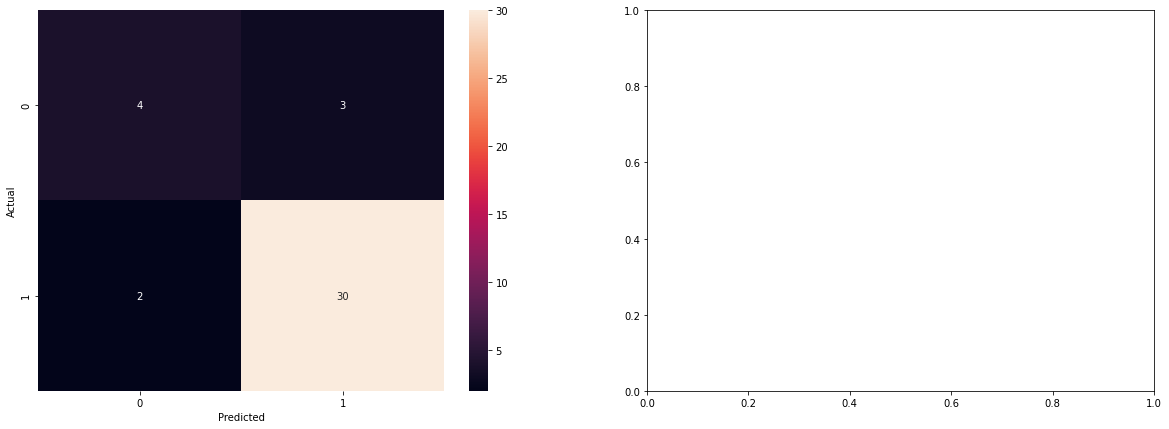

In [27]:
probabilities = model.predict_proba(x_test)
first,second,thresholds = roc_curve(y_test, probabilities[:,1])
cm = confusion_matrix(y_test, y_pred, labels=None, sample_weight=None, normalize=None)
fig, axis = plt.subplots(1,2, figsize=(20, 7))
#plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True, fmt='d',ax=axis[0])
axis[0].set(xlabel='Predicted', ylabel='Actual')
#plt.ylabel('Actual')
#plt.xlabel('Predicted')

C:\Users\Arinola\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


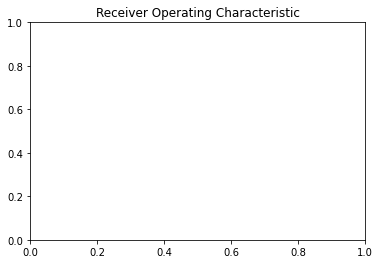

In [28]:
#first,second,thresholds = roc_curve(y_test, probabilities[:,1])
# Lineplot
plt.title('Receiver Operating Characteristic')
sn.lineplot(first, second, ax=axis[1])
axis[1].set(xlabel = 'False Positive Rate', ylabel = 'True Positive Rate')
plt.show()